In [22]:
import numpy as np 
import matplotlib.pyplot as plt

In [24]:
def rad2deg(rad):
    return rad*180/np.pi

def deg2rad(deg):
    return deg*np.pi/180


## VAB = ?

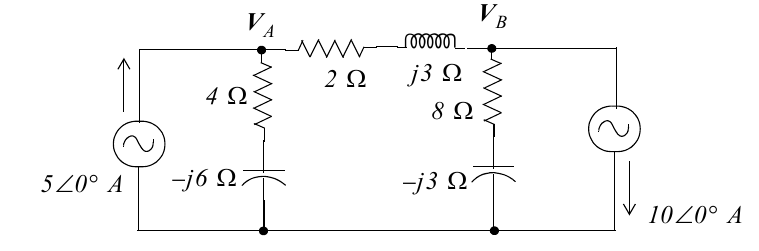

### 10A'lik kaynak açık devre (10A source is open)

In [2]:
Z1 = 4-6j
Z2 = 2 + 3j + 8 - 3j

In [4]:
I2 = (Z1/(Z1+Z2))*5
I1 = (Z2/(Z1+Z2))*5

In [6]:
Va1 = I1*Z1
Vb1 = I2*(8-3j)
Vab1 = Va1-Vb1
Vab1

(7.8448275862069+3.362068965517242j)

### 5A'lik kaynak açık devre (5A source is open)

In [9]:
Z3 = 8-3j
Z4 = 4-6j+2+3j

In [11]:
I3 = (Z4/(Z3+Z4))*10
I4 = (Z3/(Z3+Z4))*10

(4.3965517241379315-0.2586206896551726j)

In [12]:
Vb2 = 0
Va2 = I4*(2+3j)
Vab2 = Va2-Vb2
Vab2

(10.43103448275862+17.32758620689655j)

### Süperpozisyon İlkesini Uygulayalım

In [13]:
VA = Va1+Va2
VB = Vb1+Vb2
VAB = VA-VB
VAB

(18.27586206896552+20.689655172413794j)


## Compute and plot all phasor voltages 

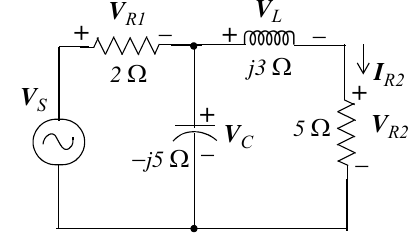

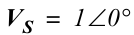

Önce birinci gözde bir göz analizi yapalım: (mesh analysis for first mesh)

### $ V_s - i_1*2 - [(i_1 - i_2)*(-5j)] = 0 $

### $ V_s - i_1*2 + i_1*5j - i_2*5j = 0 $

# $ V_s -i_1*(2-5j) - i_2*5j = 0$

Şimdi de ikinci gözde bir göz analizi yapalım:  (mesh analysis for second mesh)

### $ (i_2 - i_1)*(-5j) + i_2*3j + i_2*5 = 0 $

### $   i_2*(-5j) + i_1*5j + i_2*3j + i_2*5 = 0  $

### $   i_2*(-5j+3j+5) + i_1*5j = 0$

### $   i_2*(-5+2j) = i_1*5j $

# $   i_2 = i_1*(\frac{5j}{-5+2j})$

$i_2$ değerini birinci göz denkleminde yerine yazalım (make I2 -> I1 again!!)

### $  V_s -i_1*(2-5j) - i_1*(\frac{5j}{-5+2j})*5j = 0$

### $  V_s - i_1*((2-5j)+(5j*(\frac{5j}{-5+2j})) = 0 $

### $  V_s = i_1*((2-5j)+(5j*(\frac{5j}{-5+2j}))$

# $  i_1 = \frac{V_s}{((2-5j)+(5j*(\frac{5j}{-5+2j}))}$

In [168]:
I1 = 1/((2-5j)+(5j*(5j/(-5+2j))))
I1

(0.12482946793997271+0.06480218281036833j)

In [169]:
I2 = I1 * (5j/(-5+2j))
I2

(0.09890859481582537-0.08526603001364258j)

In [170]:
Vc1 = (I1-I2)*(-5j)
Vc1

(0.7503410641200545-0.1296043656207367j)

In [172]:
Vr2 = I2*5
Vr2

(0.49454297407912684-0.4263301500682129j)

In [173]:
Vl = Vc1-Vr2
Vl

(0.2557980900409277+0.2967257844474762j)

In [191]:
f = 1
w = 2 * np.pi* f # = 2*pi*f
t = np.linspace(0,1,1000)

In [174]:
def vs(t):
    return np.cos(w*t)

Komplex formdaki çıkış voltajlarını(Vc1,Vr2,Vl) fazör forma çevirerek zamana ve frekansa bağlı fonksiyonlar elde edelim: 

(time time frequency time ... but how?)

## $Z = a + jb $

## $ Z = r*cos(wt + \theta)$

## $ r = \sqrt{(a^2)+(b^2)}$

## $ \theta = tan^-1(\frac{b}{a})$ 
beaware of radians and degrees, can hurt

In [175]:
r_vc1 = np.sqrt(Vc1.real**2+Vc1.imag**2)
theta_vc1 = rad2deg(np.arctan(Vc1.imag/Vc1.real))

In [176]:
def vc1(t):
    return r_vc1*np.cos(w*t+theta_vc1)

In [177]:
r_vr2 = np.sqrt(Vr2.real**2+Vr2.imag**2)
theta_vr2 = rad2deg(np.arctan(Vr2.imag/Vr2.real))

In [178]:
def vr2(t):
    return r_vr2*np.cos(w*t+theta_vr2)

In [179]:
r_vl = np.sqrt(Vl.real**2+Vl.imag**2)
theta_vl = rad2deg(np.arctan(Vl.imag/Vl.real))

In [180]:
def vl(t):
    return r_vl*np.cos(w*t+theta_vl)

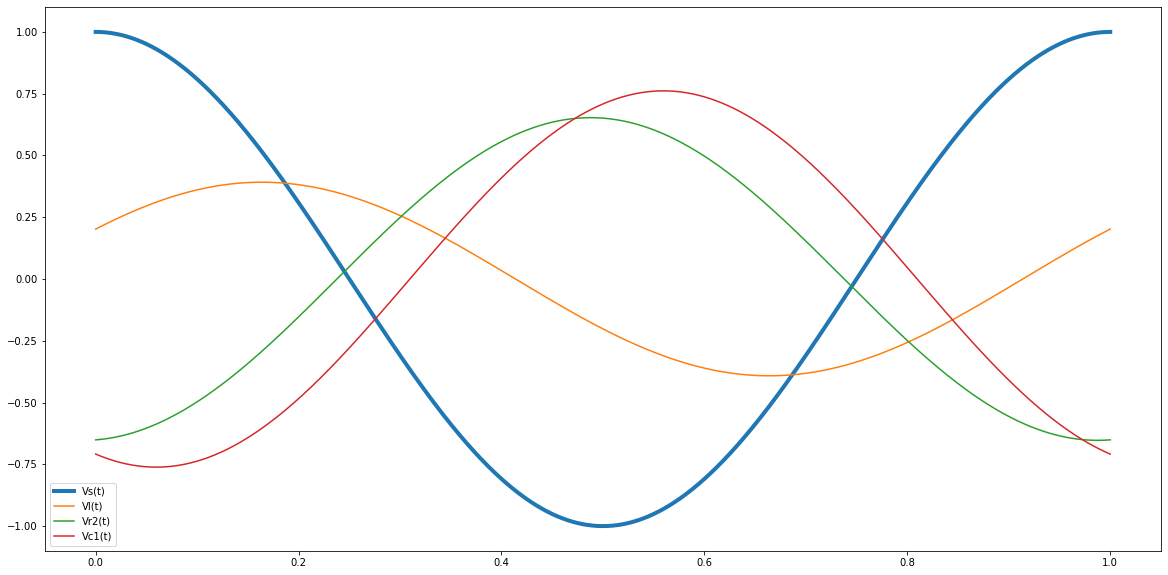

In [193]:
#show time plot time 
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(t,vs(t),label="Vs(t)",lw = 4)
ax.plot(t,vl(t),label="Vl(t)")
ax.plot(t,vr2(t),label="Vr2(t)")
ax.plot(t,vc1(t),label="Vc1(t)")
ax.legend()